# Alineamiento del sistema 4f


**Autor**: Luis Miguel Sánchez Brea.

**Fecha**: 01/07/2019.

**Objetivo**: Puesta a punto de SLM.

**Descripción**: Se pretende alinear el sistema 4f

* se envía una imagen conocida
* se mueven los motores indefinidamente entre dos posiciones

In [1]:
%run config_jupyter.ipynb

In [2]:
import time
from pprint import pprint
import cv2
import screeninfo

In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [4]:
from py_slm.smc100 import SMC100
import py_slm.camera.tisgrabber as IC
from py_slm.py_slm import SLM
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE


In [5]:
s=1.

### Cargar modulador

In [6]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [7]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xeb19048>)

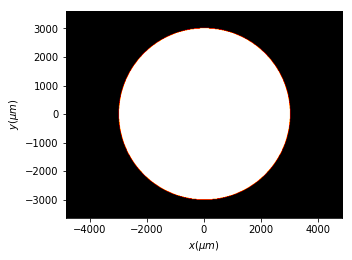

In [18]:
t = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
#t.square(r0=(0,0), size=(1*mm, 1*mm), angle=0*degrees)
#t.axicon(r0=(0,0), radius=1*mm, height=12*um, n=1.5)
t.grating_2D_ajedrez(period=1*mm, amin=0,   amax=1., phase=0,
                   x0=0, fill_factor=0.5,   angle=0.0 * degrees)

t.draw(kind='intensity')

### Cargar lente en modulador

In [13]:
"Creamos la imagen a partir de la máscara creada."
slm.mask_to_rawImage(mask_XY=t, kind='intensity', normalize=True);

In [14]:
"Enviamos la imagen al SLM."
slm.send_image_screen()
cv2.waitKey(500)

-1

In [15]:
cv2.destroyAllWindows()

## Lente fase

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xd7a3470>)

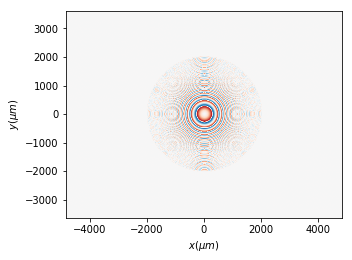

In [28]:
t = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)

t.lens(r0=(0 * um, 0 * um), radius=(2 * mm, 2*mm), focal=(125 * mm, 125 * mm), angle=0 * degrees, mask=True)
t.draw('phase')

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xdca62b0>)

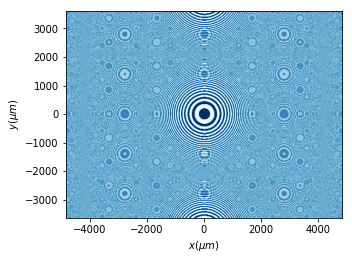

In [33]:
t.fresnel_lens( r0=(0 * um, 0 * um), radius=(2 * mm, 2*mm), focal=(125 * mm, 125 * mm), 
               angle=0 * degrees, mask=True,       kind='phase',phase=np.pi)
t.draw('phase')

In [34]:
"Creamos la imagen a partir de la máscara creada."
slm.mask_to_rawImage(mask_XY=t, kind='phase', normalize=True);

In [35]:
"Enviamos la imagen al SLM."
slm.send_image_screen()
cv2.waitKey(500)

-1

### control camara

In [11]:
Camera=slm.camera1

In [44]:
gain_value=3
exposure_value=-3

In [45]:
Camera.SetPropertySwitch("Gain", "Auto", 0)
Camera.SetPropertySwitch("Exposure", "Auto", 0)
Camera.SetPropertyValue("Gain", "Value", gain_value)
Camera.SetPropertyValue("Exposure", "Value", exposure_value)

1

### Cargar motor

In [6]:
smc100 = SMC100(1, 'COM3', silent=True)
smc100.set_velocity(20*mm/s, check=True)
smc100.home()

Connecting to SMC100 on COM3
(20.0, 20.0)


In [22]:
smc100.set_velocity(10*mm/s, check=True)


(10.0, 10.0)


In [40]:
smc100.move_absolute(-123.7*mm+2*98.767*mm+20*mm)

SMC100WaitTimedOutException: Wait timed out

In [41]:
smc100.move_absolute(-123.7*mm+0*98.767*mm)

SMC100WaitTimedOutException: Wait timed out

## se mueve de forma automática

In [7]:
velocidad=20*mm/s

In [8]:
num_veces=20

In [17]:
smc100.move_absolute(0*mm)


In [10]:
pos_0=113*mm
pos_1=-120*mm

In [11]:
smc100.set_velocity(velocidad, check=True)

for i in range(num_veces):
    print("{}".format(i,sep=' ',end=' '))
    smc100.move_absolute(pos_0)
    smc100.move_absolute(pos_1)    

(20.0, 20.0)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


KeyboardInterrupt: 

cuando se tenga la posición se guarda la imagen

## Cerrar

In [42]:
smc100.close()